In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [3]:
df_Aire = pd.read_csv('dataset_limpio_Aire.csv')
df_Aire.head()

,name,measure,measure_info,geo_type_name,geo_place_name,data_value,Stations,Final Date
0,Nitrogen dioxide (NO2),Mean,ppb,UHF34,Bedford Stuyvesant - Crown Heights,25.30,Annual,2011
1,Nitrogen dioxide (NO2),Mean,ppb,UHF34,Bedford Stuyvesant - Crown Heights,26.93,Annual,2009
2,Nitrogen dioxide (NO2),Mean,ppb,UHF34,East New York,19.09,Annual,2015
3,Nitrogen dioxide (NO2),Mean,ppb,UHF34,Fordham - Bronx Pk,19.76,Annual,2015
4,Nitrogen dioxide (NO2),Mean,ppb,UHF34,Pelham - Throgs Neck,22.83,Annual,2009


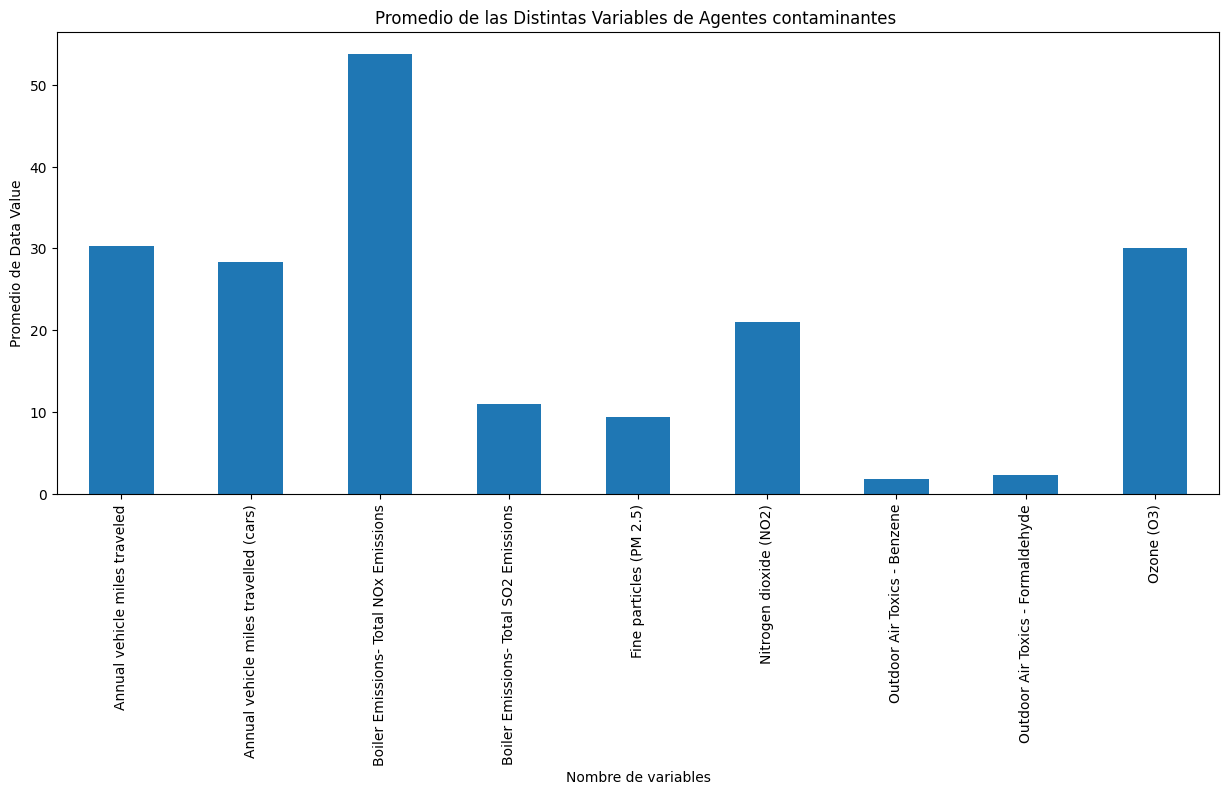

In [21]:
# creo un filtro con los agentes contaminaantes
nombres_interes = ['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)','Ozone (O3)',
                   'Boiler Emissions- Total SO2 Emissions','Boiler Emissions- Total NOx Emissions',
                   'Annual vehicle miles traveled', 'Annual vehicle miles travelled (cars)',
                   'Outdoor Air Toxics - Benzene','Outdoor Air Toxics - Formaldehyde']  # Agrega más nombres según sea necesario

# Filtrar el DataFrame para incluir solo las filas con 'Name' en la lista de nombres de interés
df_filtrado = df_Aire[df_Aire['name'].isin(nombres_interes)]

# Calcular el promedio después de aplicar el filtro
promedio_data_value = df_filtrado.groupby('name')['data_value'].mean()

plt.figure(figsize=(15, 6))

promedio_data_value.plot(kind='bar', title='Promedio de las Distintas Variables de Agentes contaminantes ')
plt.xlabel('Nombre de variables')
plt.ylabel('Promedio de Data Value')
plt.show()

Podemos observar que las emisiones de NOx por calderas es el contaminante mas alto, pero la combustion de los vehiculos especial mente los Disel y los vehiculos de inyeccion directa a altas presiones, tambien genera NOx y NO2  que al reaccionar con la finas particulas (PM2.5) y presencia de luz incrementan los niveles de ozono que es apreciable como uno de los valores mas altos y todo esto relacionado al alto transito que presenta la ciudad de Nueva York. 

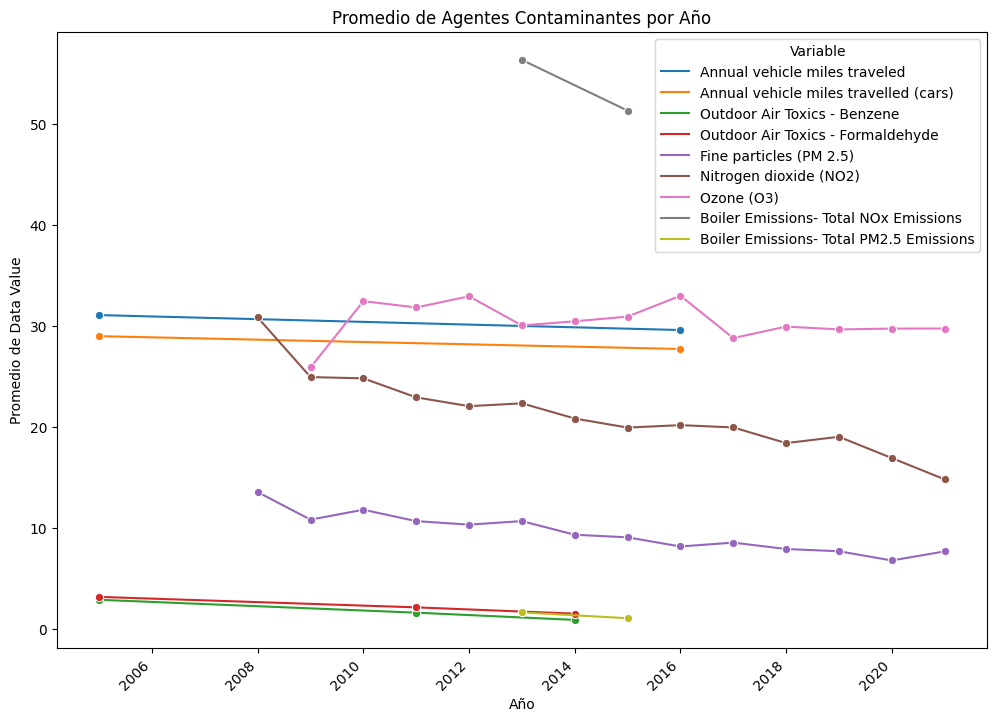

In [20]:

# Configuro el tamaño de la figura
plt.figure(figsize=(12, 8))

# Utilizar Seaborn para trazar un gráfico de líneas múltiples
sns.lineplot(data=promedio_data_value, x='Final Date', y='data_value', hue='name', marker='o')

plt.xlabel('Año')
plt.ylabel('Promedio de Data Value')
plt.title('Promedio de Agentes Contaminantes por Año')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Variable')

# Mostrar el gráfico
plt.show()

En este grafico evaluamos el comportamiento con el pasar de los años y es de notar que existe una ligera tendencia a la disminucion de los contaminantes en el aire aunque el ozono refleja un ligero asenso en los ultimo años pero se puede concluir que esta mejorando la calidad del aire, existen algunos valores faltantes pero que reflejan tendencia a disminuir.

In [19]:
df_Aire['name'].unique()

array(['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)', 'Ozone (O3)',
       'Asthma emergency department visits due to PM2.5',
       'Annual vehicle miles traveled',
       'Asthma hospitalizations due to Ozone',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Boiler Emissions- Total SO2 Emissions',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Annual vehicle miles travelled (cars)',
       'Annual vehicle miles travelled (trucks)',
       'Cardiac and respiratory deaths due to Ozone',
       'Asthma emergency departments visits due to Ozone',
       'Outdoor Air Toxics - Formaldehyde',
       'Outdoor Air Toxics - Benzene', 'Deaths due to PM2.5'],
      dtype=object)

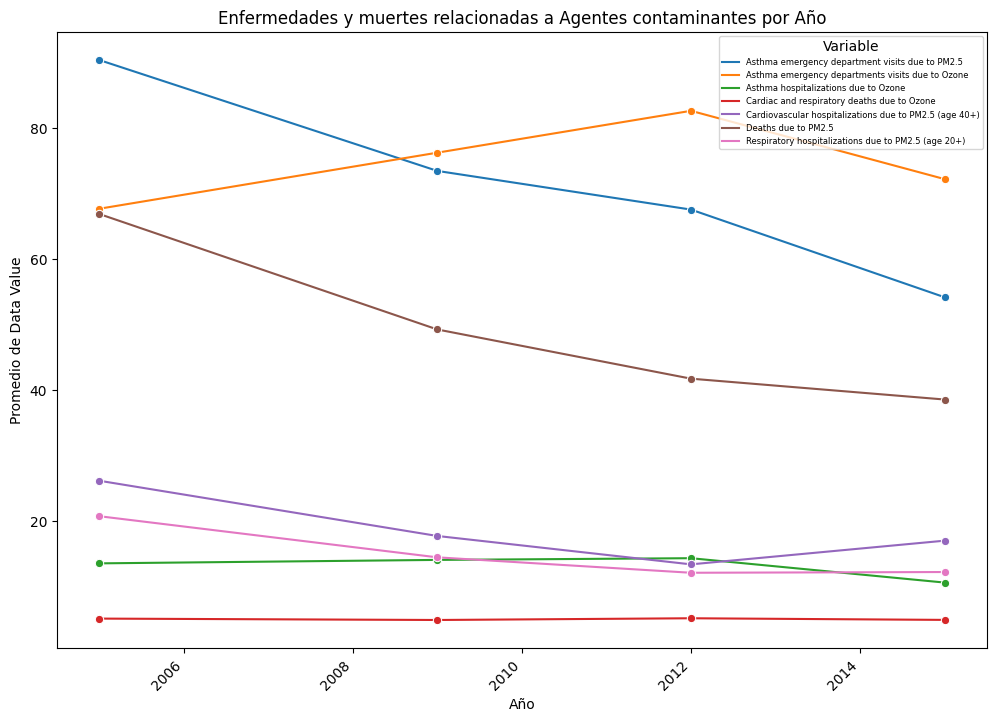

In [25]:

# Filtror datos por las variables de interés
variables_interes = ['Asthma emergency department visits due to PM2.5', 'Asthma hospitalizations due to Ozone',
                     'Respiratory hospitalizations due to PM2.5 (age 20+)', 'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
                     'Cardiac and respiratory deaths due to Ozone', 'Asthma emergency departments visits due to Ozone',
                   'Deaths due to PM2.5']
df_filtrado = df_Aire[df_Aire['name'].isin(variables_interes)]

# Calcular el promedio de los valores por fecha y variable
promedio_data_value = df_filtrado.groupby(['Final Date', 'name'])['data_value'].mean().reset_index()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Utilizar Seaborn para trazar un gráfico de líneas múltiples
sns.lineplot(data=promedio_data_value, x='Final Date', y='data_value', hue='name', marker='o')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Promedio de Data Value')
plt.title('Enfermedades y muertes relacionadas a Agentes contaminantes por Año')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la leyenda
plt.legend(title='Variable',fontsize='6')

# Mostrar el gráfico
plt.show()

Con relacion a las enfermedades podemos apreciar que en el 2012 las emergencias por asma relacionadas al ozono presentaron su pico mas alto que concuerda con los niveles de ozono para el año las enfermedades cardiovasculares aumentaron leve mente pero al igual que los agentes contaminantes se refleja una disminucion 